In [18]:
import os  
from PIL import Image  
  
# 数据集的根目录  
dataset_dir = 'D:/实用机器学习/'  
  
# 用于存储图像数据和标签的列表  
images = []  
labels = []  
class_names = []  
  
# 遍历数据集的子目录（即类别）  
for subdir, dirs, files in os.walk(dataset_dir):  
    # 忽略非类别的子目录（例如'.'和'..'）  
    if subdir == dataset_dir:  
        continue  
      
    # 获取类别名称（即子目录的名称）  
    class_name = os.path.basename(subdir)  
    class_names.append(class_name)  
      
    # 遍历该类别下的所有文件  
    for file in files:  
        # 假设所有图像文件都是.jpg格式  
        if file.lower().endswith('.jpg'):  
            # 构建图像文件的完整路径  
            file_path = os.path.join(subdir, file)  
              
            # 读取图像  
            try:  
                img = Image.open(file_path)  
                # 在这里，你可以对图像进行预处理，例如调整大小、归一化等  
                # img = img.resize((desired_width, desired_height))  
                # img = np.array(img) / 255.0  # 假设你想转换为NumPy数组并进行归一化  
                  
                # 将图像和标签添加到列表中  
                images.append(img)  # 或者你可以保存为NumPy数组  
                labels.append(class_names.index(class_name))  # 使用类别名称的索引作为标签  
            except Exception as e:  
                print(f"Error reading {file_path}: {e}")  

In [13]:
import os
from PIL import Image

# 1. 数据集划分
train_dir = 'D:/实用机器学习/train'
validation_dir = 'D:/实用机器学习/validation'
test_dir = 'D:/实用机器学习/test'

# 2. 数据预处理
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # 将图像尺寸调整为模型输入的尺寸
    img = img.convert('RGB')  # 将图像转换为RGB格式
    img = img.rotate(270)  # 将图像旋转270度
    return img

# 3. 标签编码
def encode_label(label):
    return keras.utils.to_categorical(label, num_classes=865)

class_names = ['daisy', 'tulip', 'rose', 'lily','sunflower'] 
label_to_index = {name: index for index, name in enumerate(class_names)}  
 
labels = ['daisy', 'rose', 'tulip']  
  
train_labels = []  
  
for label in labels:  
    # 使用字典来获取整数索引，而不是直接转换为整数  
    index = label_to_index[label]  
    # 如果需要，可以通过 encode_label 函数进一步处理索引  
    encoded_index = encode_label(index) if encode_label else index  
    train_labels.append(encoded_index)  
print(train_labels)  # 输出应该是 [0, 2, 1]（假设 encode_label 没有改变索引）

# 4. 读取数据集
train_images = []
train_labels = []
for label in os.listdir(train_dir):
    for image_file in os.listdir(os.path.join(train_dir, label)):
        image_path = os.path.join(train_dir, label, image_file)
        img = preprocess_image(image_path)
        train_images.append(img)
        train_labels.append(encode_label(int(label)))

ValueError: invalid literal for int() with base 10: 'daisy'

In [ ]:
import os
from PIL import Image

# 1. 数据集划分
train_dir = 'D:/实用机器学习/train'
validation_dir = 'D:/实用机器学习/validation'
test_dir = 'D:/实用机器学习/test'

# 2. 数据预处理
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # 将图像尺寸调整为模型输入的尺寸
    img = img.convert('RGB')  # 将图像转换为RGB格式
    img = img.rotate(270)  # 将图像旋转270度
    return img

# 3. 标签编码
def encode_label(label):
    return keras.utils.to_categorical(label, num_classes=865)

# 4. 读取数据集
train_images = []
train_labels = []
for label in os.listdir(train_dir):
    for image_file in os.listdir(os.path.join(train_dir, label)):
        image_path = os.path.join(train_dir, label, image_file)
        img = preprocess_image(image_path)
        train_images.append(img)
        train_labels.append(encode_label(int(label)))

# ...


In [14]:
import os
from PIL import Image

# 1. 数据集划分
train_dir = 'D:/实用机器学习/train'
validation_dir = 'D:/实用机器学习/validation'
test_dir = 'D:/实用机器学习/test'

# 2. 数据预处理
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # 将图像尺寸调整为模型输入的尺寸
    img = img.convert('RGB')  # 将图像转换为RGB格式
    img = img.rotate(270)  # 将图像旋转270度
    return img

# 3. 标签编码
def encode_label(label):
    return keras.utils.to_categorical(label, num_classes=865)

class_names = ['daisy', 'tulip', 'rose', 'lily','sunflower'] 
label_to_index = {name: index for index, name in enumerate(class_names)}  
 
labels = ['daisy', 'rose', 'tulip']  
  
train_labels = []  
  
for label in labels:  
    # 使用字典来获取整数索引，而不是直接转换为整数  
    index = label_to_index[label]  
    # 如果需要，可以通过 encode_label 函数进一步处理索引  
    encoded_index = encode_label(index) if encode_label else index  
    train_labels.append(encoded_index)  
print(train_labels)  # 输出应该是 [0, 2, 1]（假设 encode_label 没有改变索引）

NameError: name 'keras' is not defined

In [19]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.datasets import load_iris  
from sklearn.metrics import accuracy_score  
  
# 加载数据集  
iris = load_iris()  
X = iris.data  
y = iris.target  
  
# 划分训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
  
# 数据标准化  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  
  
# 创建KNN分类器实例并训练  
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)  
  
# 预测测试集  
y_pred = knn.predict(X_test)  
  
# 评估分类器  
accuracy = accuracy_score(y_test, y_pred)  
print(f"KNN分类器准确率: {accuracy}")

KNN分类器准确率: 1.0


In [20]:
from sklearn.linear_model import LogisticRegression  
  
# 创建逻辑回归分类器实例并训练  
logreg = LogisticRegression(max_iter=1000)  # 设置max_iter以避免收敛警告  
logreg.fit(X_train, y_train)  
  
# 预测测试集  
y_pred = logreg.predict(X_test)  
  
# 评估分类器  
accuracy = accuracy_score(y_test, y_pred)  
print(f"逻辑回归分类器准确率: {accuracy}")

逻辑回归分类器准确率: 1.0


In [21]:
from sklearn import svm  
  
# 创建SVM分类器实例并训练  
svm_clf = svm.SVC(kernel='linear', C=1, random_state=42)  
svm_clf.fit(X_train, y_train)  
  
# 预测测试集  
y_pred = svm_clf.predict(X_test)  
  
# 评估分类器  
accuracy = accuracy_score(y_test, y_pred)  
print(f"SVM分类器准确率: {accuracy}")

SVM分类器准确率: 0.9666666666666667


In [22]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.datasets import load_iris  
from sklearn.metrics import accuracy_score  
  
# 加载鸢尾花数据集  
iris = load_iris()  
X = iris.data  
y = iris.target  
  
# 划分数据集为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
  
# 数据标准化（对于KNN来说，这一步通常很重要）  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  
  
# 初始化KNN分类器，这里我们设置k=3  
knn = KNeighborsClassifier(n_neighbors=3)  
  
# 训练KNN分类器  
knn.fit(X_train, y_train)  
  
# 使用KNN分类器进行预测  
y_pred = knn.predict(X_test)  
  
# 计算并打印准确率  
accuracy = accuracy_score(y_test, y_pred)  
print(f"KNN分类器准确率: {accuracy}")  
  
# 还可以进一步查看预测结果和真实标签的对比  
print("预测结果:", y_pred)  
print("真实标签:", y_test)

KNN分类器准确率: 1.0
预测结果: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
真实标签: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [23]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.datasets import load_iris  
from sklearn.metrics import accuracy_score  
  
# 加载鸢尾花数据集  
iris = load_iris()  
X = iris.data  
y = iris.target  
  
# 将特征和标签转换为DataFrame  
df = pd.DataFrame(X, columns=iris.feature_names)  
df['target'] = iris.target_names[y]  
  
# 划分数据集为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
  
# 数据标准化  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  
  
# 初始化KNN分类器  
knn = KNeighborsClassifier(n_neighbors=3)  
  
# 训练KNN分类器  
knn.fit(X_train, y_train)  
  
# 预测测试集  
y_pred = knn.predict(X_test)  
  
# 计算准确率  
accuracy = accuracy_score(y_test, y_pred)  
  
# 将预测结果和真实标签转换为DataFrame  
results_df = pd.DataFrame({  
    'Actual': iris.target_names[y_test],  
    'Predicted': iris.target_names[y_pred]  
})  
  
# 打印准确率  
print(f"KNN分类器准确率: {accuracy}")  
  
# 打印结果表格  
print(results_df)

KNN分类器准确率: 1.0
        Actual   Predicted
0   versicolor  versicolor
1       setosa      setosa
2    virginica   virginica
3   versicolor  versicolor
4   versicolor  versicolor
5       setosa      setosa
6   versicolor  versicolor
7    virginica   virginica
8   versicolor  versicolor
9   versicolor  versicolor
10   virginica   virginica
11      setosa      setosa
12      setosa      setosa
13      setosa      setosa
14      setosa      setosa
15  versicolor  versicolor
16   virginica   virginica
17  versicolor  versicolor
18  versicolor  versicolor
19   virginica   virginica
20      setosa      setosa
21   virginica   virginica
22      setosa      setosa
23   virginica   virginica
24   virginica   virginica
25   virginica   virginica
26   virginica   virginica
27   virginica   virginica
28      setosa      setosa
29      setosa      setosa


In [24]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, f1_score, classification_report  
from sklearn.datasets import load_iris  
  
# 加载鸢尾花数据集  
iris = load_iris()  
X = iris.data  
y = iris.target  
  
# 划分数据集为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
  
# 数据标准化  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  
  
# 初始化并训练三种分类器  
classifiers = {  
    'KNN': KNeighborsClassifier(n_neighbors=3),  
    'SVC': SVC(kernel='linear', C=1, probability=True),  
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)  
}  
  
results = []  
  
# 训练每个分类器并进行预测  
for name, classifier in classifiers.items():  
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)  
    f1 = f1_score(y_test, y_pred, average='macro')  # 使用macro平均计算F1分数  
    results.append({  
        'Classifier': name,  
        'Accuracy': accuracy,  
        'F1 Score': f1  
    })  
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}\n")  
  
# 将结果转换为DataFrame并打印  
df_results = pd.DataFrame(results)  
print(df_results)  
  
# 查找F1分数大于0.9但不等于1的分类器  
best_classifier = df_results[df_results['F1 Score'] > 0.9 & df_results['F1 Score'] < 1]['Classifier'].values  
print(f"The best classifier with F1 score > 0.9 and < 1 is: {best_classifier[0]}")

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


SVC Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


RandomForest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00    

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [31]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 定义图像数据生成器
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 将像素值归一化到0-1之间
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% 的数据用于验证
)

# 训练集生成器
train_generator = train_datagen.flow_from_directory(
    'limited_dataset/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # 设置为训练集
)

# 验证集生成器
validation_generator = train_datagen.flow_from_directory(
    'dataset/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # 设置为验证集
)

# 构建CNN模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 五个类别
])

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20  # 你可以根据需要调整epoch数量
)

# 保存模型
model.save('dog_breed_classifier_01.h5')

ModuleNotFoundError: No module named 'tensorflow'

IndexError: list index out of range

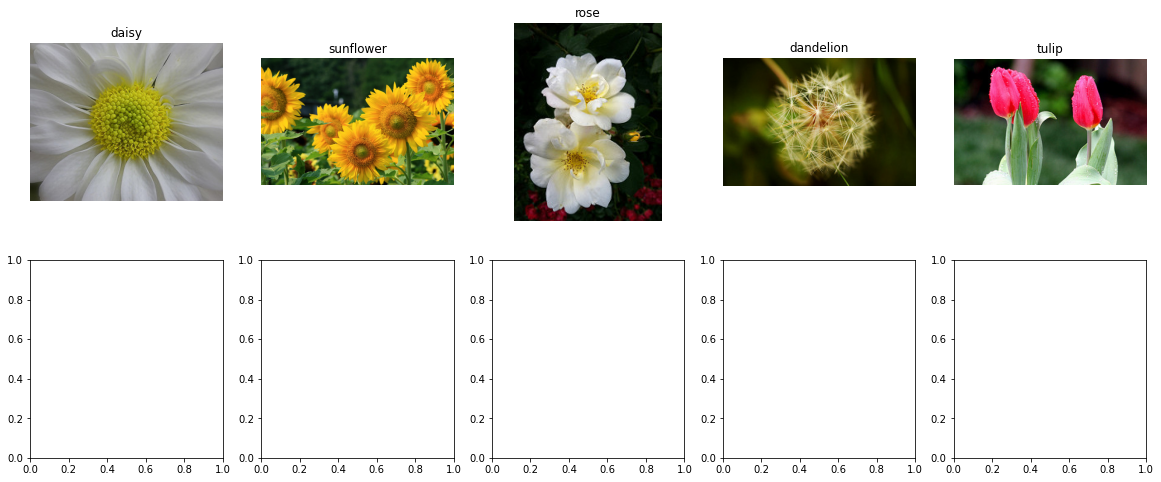

In [26]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# 设置数据源目录路径
data_source_dir = r"D:\实用机器学习\test"

# 获取数据源目录下的所有文件夹（假设每个文件夹代表一个类别）
flower_breeds = ['daisy', 'sunflower', 'rose', 'dandelion', 'tulip']
breed_directories = [os.path.join(data_source_dir, breed) for breed in flower_breeds]

# 创建图形和子图
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# 遍历子图轴，并加载每个类别的图片
for indx, axis in enumerate(axes.flatten()):
    # 读取每个类别文件夹下的第一张图片
    breed_dir = breed_directories[indx]
    if os.path.exists(breed_dir) and os.listdir(breed_dir):  # 确保目录存在且不为空
        img_path = os.path.join(breed_dir, os.listdir(breed_dir)[0])
        img = Image.open(img_path)  # 使用PIL读取图像
        axis.imshow(img)
        axis.axis('off')  # 不显示坐标轴
        axis.set_title(flower_breeds[indx])  # 设置子图标题
    else:
        axis.text(0.5, 0.5, 'No images found', horizontalalignment='center', verticalalignment='center')

# 调整子图布局
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()  # 显示图形

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 定义图像数据生成器
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 将像素值归一化到0-1之间
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% 的数据用于验证
)

# 训练集生成器
train_generator = train_datagen.flow_from_directory(
    'D:/实用机器学习/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # 设置为训练集
)

# 验证集生成器
validation_generator = train_datagen.flow_from_directory(
    'D:/实用机器学习/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # 设置为验证集
)

# 构建CNN模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 五个类别
])

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20  # 你可以根据需要调整epoch数量
)

# 保存模型
model.save('flower_breed_classifier_01.h5')


ModuleNotFoundError: No module named 'tensorflow'

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
   -------------------------------------- 276.5/276.5 MB 507.6 kB/s eta 0:00:00
   -------------------------------------- 133.7/133.7 kB 875.6 kB/s eta 0:00:00
   ---------------------------------------- 57.5/57.5 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 4.1/4.1 MB 611.6 kB/s eta 0:00:00
   ---------------------------------------- 1.7/1.7 MB 589.0 kB/s eta 0:00:00
Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
   ---------------------------------------- 14.9/14.9 MB 328.8 kB/s eta 0:00:00
   ---------------------------------------- 65.5/65.5 kB 587.7 kB/s eta 0:00:00
   -------------------------------------- 413.4/413.4 kB 353.3 kB/s eta 0:00:00
   ---------------------------------------- 5.6/5.6 MB 427.6 kB/s eta 0:00:00

  You can safely remove it manually.
